# Example Notebook

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
os.chdir('C:\\Users\matus\pysource\portfolio-swissknife')

In [22]:
from portfolio import Portfolio
import estimation as est
import optimization as opt
import plotting
import metrics

## 1. Loading Data and Setup
- We first load the data using the `Portfolio` class and it's associated method `get_prices`. The analysis is restricted by a period required to be set by `set_period`. 

In [77]:
securities_big = ['SPY', 'BND', 'GLD', '^RUT']
pf1 = Portfolio(securities_big)
pf1.set_period(('2017-01-01', '2021-05-28'))
pf1.get_prices('daily')

[*********************100%***********************]  4 of 4 completed


In [78]:
pf1.set_benchmark('SPY')
pf1.set_discount('^TNX')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## 2. Performing a Historical Backtest

- Then we set the constraints using `set_constraints` and conduct a historical backtest. This will store backtest results in the `Portfolio` class based on the frequency of the rebalance (in trading days), it's estimation period (in trading days) and the model selected in the `models: list`. The supported models are:
 - Equal Weights (EW)
 - Global Minimum Variance (GMV)
 - Equal Risk Contribution (RP)
 - Maximum Diversification Ratio (MDR)
 - Maximum Sharpe Ratio (MSR)
 - Minimum Expected Shortfall (MES)
 - Minimum Maximum Drawdown (MDD)

In [74]:
pf1.set_constraints(default=True) #defaults to long_only full invested portfolio with no leverage
pf1.historical_backtest(models=['EW','RP', 'GMV', 'MDD', 'MDR'], frequency=22, estimation_period = 252)

<AxesSubplot:>

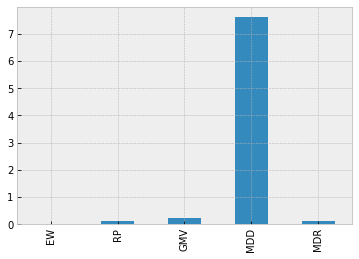

In [75]:
#runtimes
pd.DataFrame(pf1.backtest).loc['opt_time'].plot(kind='bar')

C:\Users\matus\pysource\portfolio-swissknife\metrics.py:98: RuntimeWarning: invalid value encountered in sqrt
  'Sortino Ratio': r.aggregate(information_ratio, r_f = r_f, ratio_type = 'sortino',


,EW,RP,GMV,MDD,MDR
Average Returns,11.97%,12.10%,3.76%,3.69%,7.16%
CAGR,11.73%,11.83%,3.64%,3.45%,7.02%
Volatility,34.61%,34.80%,19.41%,19.21%,26.77%
Max DD,21.75%,22.20%,10.04%,17.26%,15.52%
Skewness,-1.25,-1.23,-3.75,-1.67,-1.59
Kurtosis,-2.99,-2.99,-2.89,-2.94,-2.96
Sharpe Ratio,0.29,0.29,0.10,0.09,0.20
Sortino Ratio,0.83,0.82,0.29,0.24,0.62
Calmar Ratio,-0.55,-0.55,-0.37,-0.21,-0.46
Pain Ratio,541.95,541.65,179.90,151.71,349.62


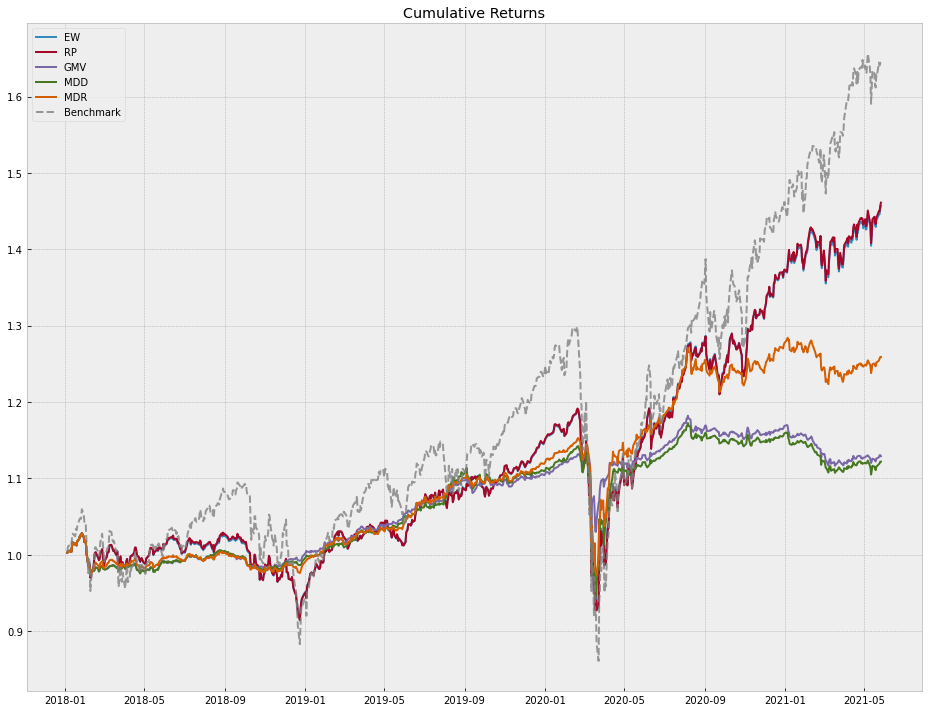

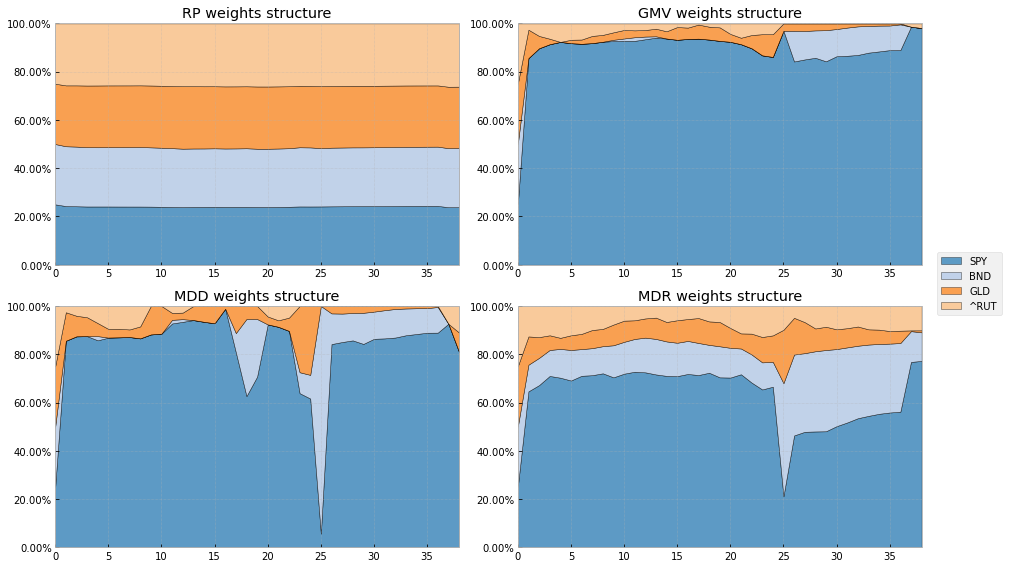

In [76]:
pf1.get_backtest_report(num_rows=2)